In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.cluster import (
    KMeans,
    AffinityPropagation,
    MeanShift,
    AgglomerativeClustering,
    DBSCAN,
    estimate_bandwidth
)
from sklearn.preprocessing import StandardScaler

In [3]:
file = pd.read_csv("s1.txt", delimiter="    ", header = None, names = ["x", "y"])

C:\Users\nikit\AppData\Local\Temp\ipykernel_872\3676094884.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv("s1.txt", delimiter="    ", header = None, names = ["x", "y"])


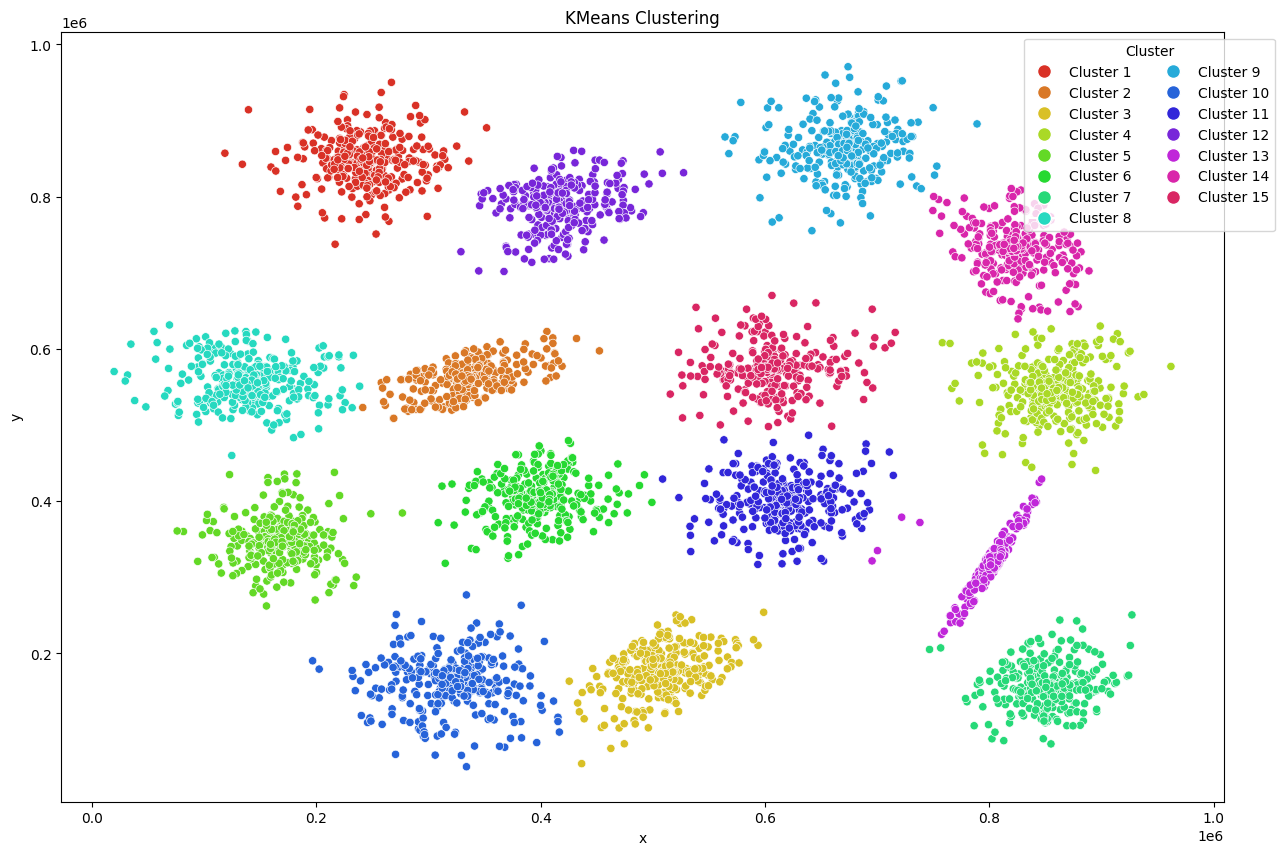

In [4]:
X = file
kmeans = KMeans(n_clusters=15)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(15, 10))
plt.title("KMeans Clustering")
plt.xlabel("x")
plt.ylabel("y")

palette = sns.color_palette(sns.hls_palette(15, l=.5, s=.7))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels, palette=palette)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i+1}", markerfacecolor=palette[i], markersize=10) for i in range(15)]
plt.legend(handles=legend_handles, title="Cluster", loc="upper right", bbox_to_anchor=(1.05, 1), ncol=2, prop={"size": 10})
plt.show()

           X          Y
0  11.068078  22.130223
1  18.287328  10.407841
2  61.742271  88.216707
3  27.611052  39.052678
4  73.939912  17.951670
5  17.824696  45.839855
6  38.543710  24.608851
7  55.301551  35.434966
8  12.379488  94.319811
9  65.120782  65.589707


C:\Users\nikit\AppData\Local\Temp\ipykernel_872\934367328.py:33: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels, palette=palette)


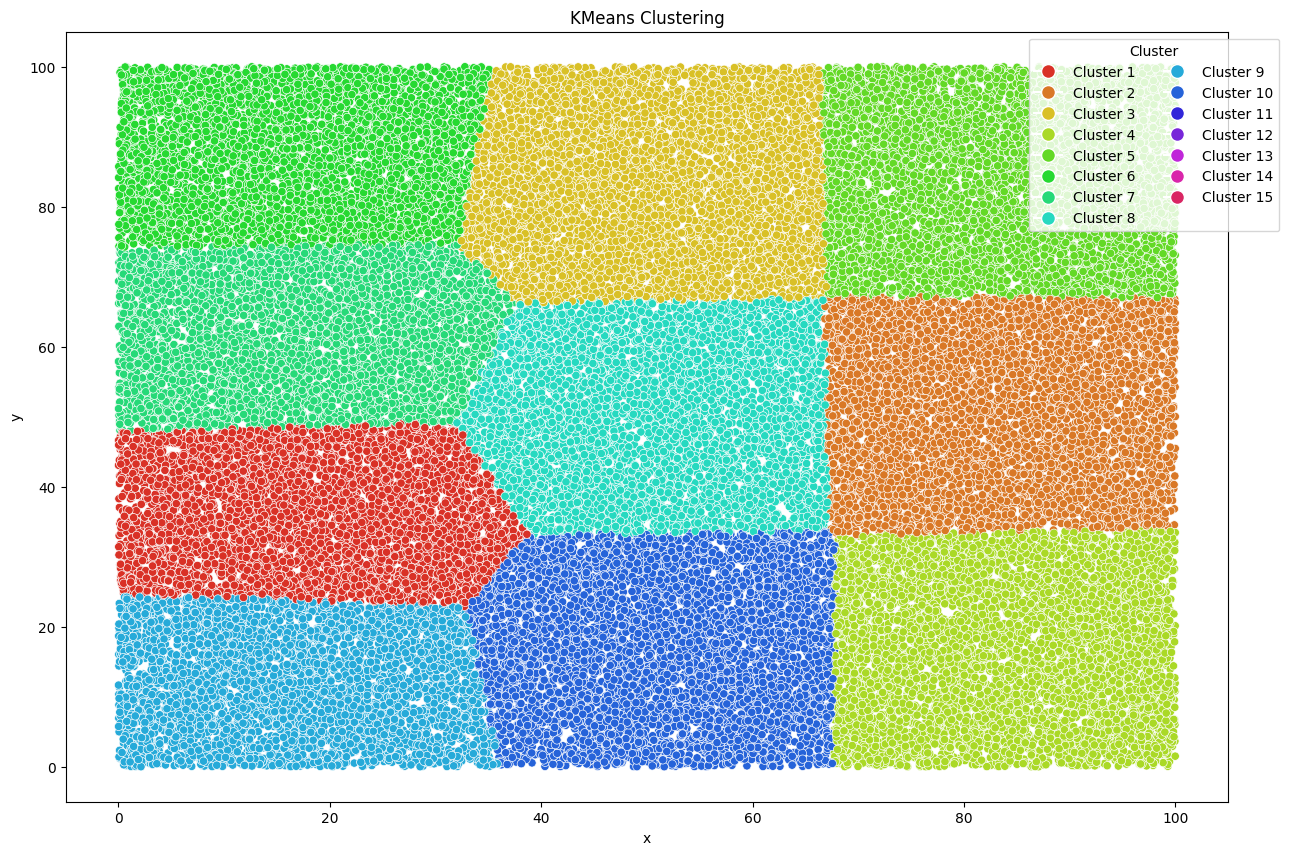

In [23]:
def generate_uniform_dataset(n_samples=5000, x_range=(0, 100), y_range=(0, 100)):
    """
    Генерирует датасет с координатами, равномерно распределёнными в заданном диапазоне.

    :param n_samples: Количество точек в датасете.
    :param x_range: Диапазон значений для координаты X (кортеж из двух чисел).
    :param y_range: Диапазон значений для координаты Y (кортеж из двух чисел).
    :return: DataFrame с двумя столбцами: 'X' и 'Y'.
    """
    x_values = np.random.uniform(x_range[0], x_range[1], n_samples)
    y_values = np.random.uniform(y_range[0], y_range[1], n_samples)
    
    df = pd.DataFrame({'X': x_values, 'Y': y_values})
    return df

# Генерация датасета
dataset = generate_uniform_dataset(n_samples=50000, x_range=(0, 100), y_range=(0, 100))

# Вывод первых 10 строк датасета
print(dataset.head(10))

X = dataset
kmeans = KMeans(n_clusters=10, max_iter=10000)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(15, 10))
plt.title("KMeans Clustering")
plt.xlabel("x")
plt.ylabel("y")

palette = sns.color_palette(sns.hls_palette(15, l=.5, s=.7))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels, palette=palette)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i+1}", markerfacecolor=palette[i], markersize=10) for i in range(15)]
plt.legend(handles=legend_handles, title="Cluster", loc="upper right", bbox_to_anchor=(1.05, 1), ncol=2, prop={"size": 10})
plt.show()

In [5]:
X = file
ap = AffinityPropagation(damping=0.9, preference=-500_000_000_000)
ap.fit(X)
X["cluster"] = ap.predict(X)


In [6]:
labels = ap.labels_
len(np.unique(X["cluster"]))

15

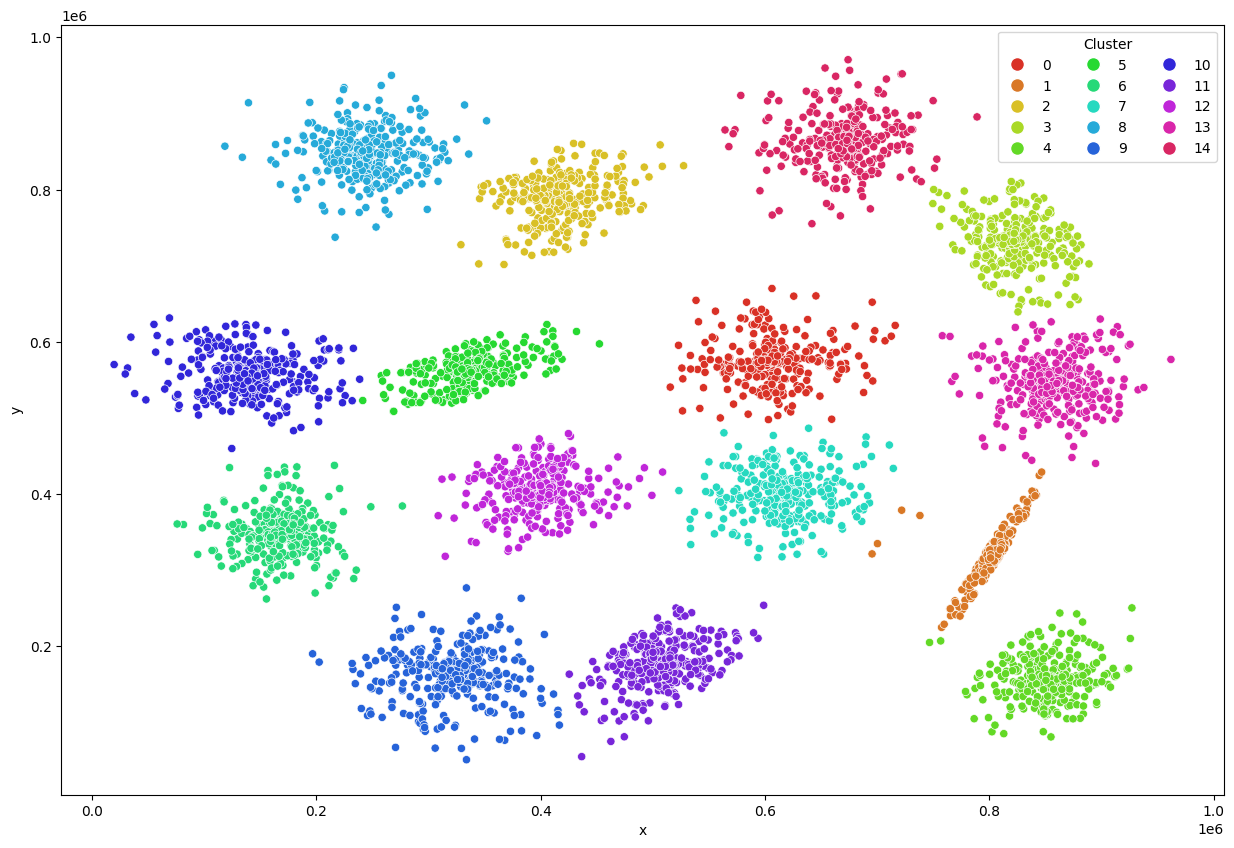

In [7]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="x", y="y", hue="cluster", palette= sns.hls_palette(15, l=.5, s=.7), marker="o", data=X)
legend_points = [plt.Line2D([0], [0], marker='o', color='w', label=str(i),
                           markerfacecolor=sns.hls_palette(15, l=.5, s=.7)[i],
                           markersize=10) for i in range(15)]
plt.legend(handles=legend_points, loc='upper right', title="Cluster", ncol=3)
plt.show()

In [12]:
X = file  # assuming your data is a Pandas DataFrame

# Выполнение кластеризации методом MeanShift
bandwidth = 1.5  # Подберите параметр для получения большего количества кластеров
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift.fit(X)

# Получение меток кластеров от MeanShift
initial_labels = mean_shift.labels_
initial_cluster_centers = mean_shift.cluster_centers_

# Агломеративная кластеризация для уменьшения количества кластеров до 15
agglomerative = AgglomerativeClustering(n_clusters=15)
final_labels = agglomerative.fit_predict(initial_cluster_centers)

# Создание новой таблицы с уменьшенным количеством кластеров
df = X
df['Initial Cluster'] = initial_labels
df['Final Cluster'] = final_labels[initial_labels]

# Вывод первых 10 строк таблицы
print(df.head(10))

# Вывод количества уникальных кластеров
unique_clusters = np.unique(df['Final Cluster'])
print(f'Количество уникальных кластеров: {len(unique_clusters)}')

        x       y  cluster  Cluster  Initial Cluster  Final Cluster
0  664159  550946        0       10             1600             12
1  665845  557965        0       10             1587             12
2  597173  575538        0       10             2116             12
3  618600  551446        0       10             1878             12
4  635690  608046        0       10             1749             12
5  588100  557588        0       10             2173             12
6  582015  546191        0       10             2193             12
7  604678  574577        0       10             2035             12
8  572029  518313        0       10             2228             12
9  604737  574591        0       10             2033             12
Количество уникальных кластеров: 15


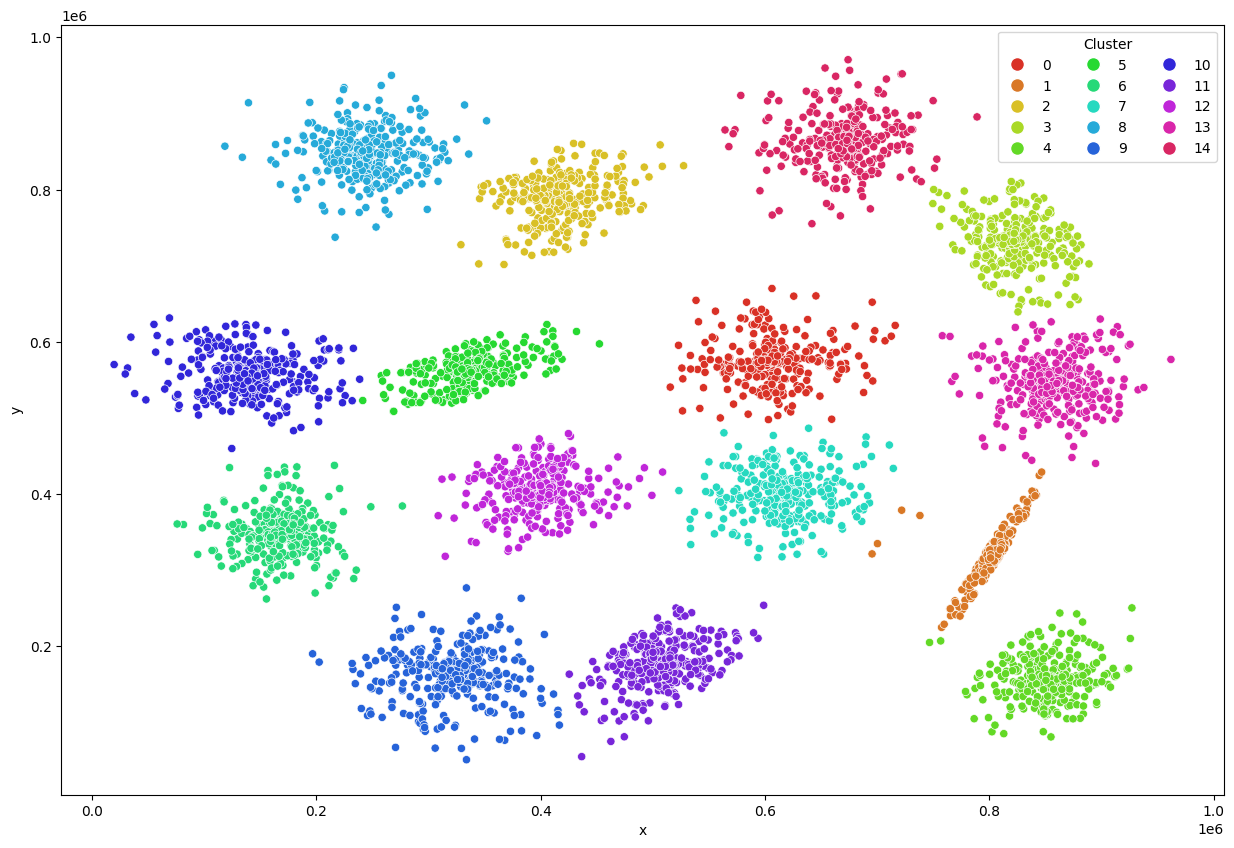

In [25]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="x", y="y", hue="cluster", palette= sns.hls_palette(15, l=.5, s=.7), marker="o", data=df)
legend_points = [plt.Line2D([0], [0], marker='o', color='w', label=str(i),
                           markerfacecolor=sns.hls_palette(15, l=.5, s=.7)[i],
                           markersize=10) for i in range(15)]
plt.legend(handles=legend_points, loc='upper right', title="Cluster", ncol=3)
plt.show()